## <center> 图同构网络-GIN (Graph Isomorphism Network)

### 一、GIN 的核心思想

GIN 是为了解决图同构问题而设计的，它的目标是创建一个具有最大表达能力的图神经网络。GIN 的主要特点是:

1. 注入节点度信息: 通过在聚合过程中加入中心节点的信息。
2. 可学习的 ε: 引入一个可学习的参数 ε 来调整中心节点的权重。
3. 多层感知机 (MLP): 使用 MLP 作为更新函数，增强模型的表达能力。

GIN 的更新公式可以表示为:

$$h_v^{(k)} = \text{MLP}^{(k)}\left((1 + \epsilon^{(k)}) \cdot h_v^{(k-1)} + \sum_{u \in {N}(v)} h_u^{(k-1)}\right)$$

其中:
- $h_v^{(k)}$ 是节点 v 在第 k 层的表示
- ${N}(v)$ 是节点 v 的邻居集合
- $\epsilon^{(k)}$ 是第 k 层的可学习参数
- $\text{MLP}^{(k)}$ 是第 k 层的多层感知机

Original node features:
[[ 0.95205741 -1.35046989  0.54112025]
 [-0.01294182 -1.66890369  0.80547711]
 [ 0.2162391  -0.03238461  1.81560024]
 [ 0.06557219  0.27194858 -0.05928963]
 [-0.02275511 -1.21704611  0.92908501]]

Updated node features:
[[-0.91265147  0.83883495 -0.564743  ]
 [-0.91127613  0.83540683 -0.56995124]
 [-0.91116062  0.83512443 -0.57038246]
 [-0.88216157  0.78281224 -0.59614501]
 [-0.78872472  0.71055917 -0.37673496]]

Epsilon value: 0.006889146679368574


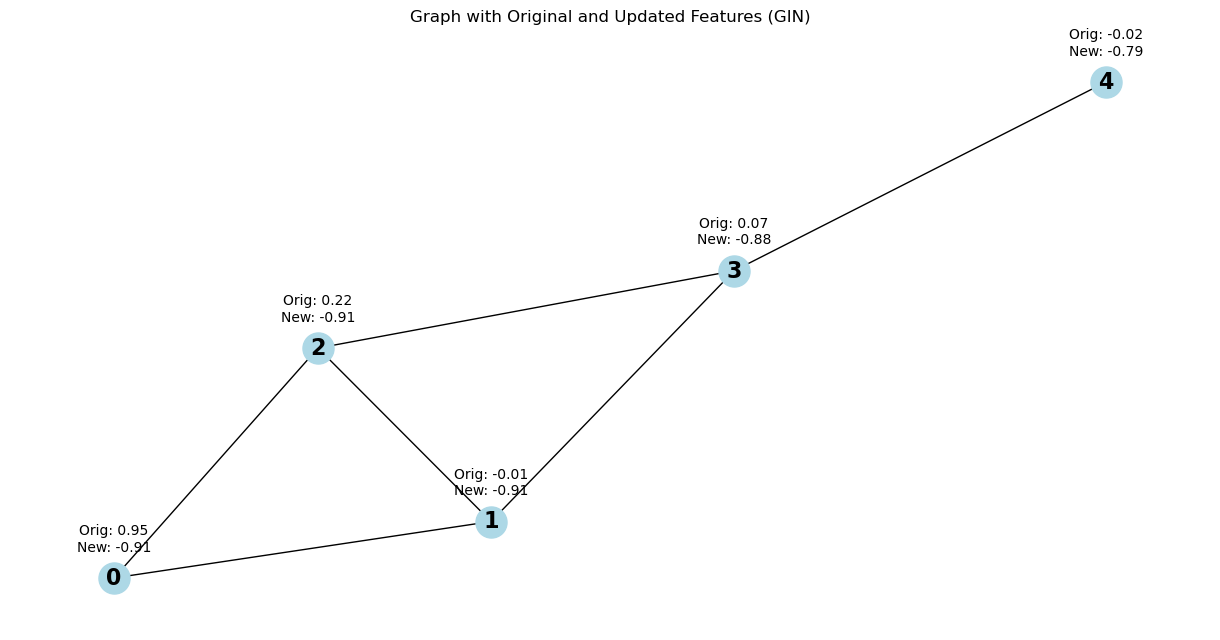

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def create_graph():
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)])
    return G

def mlp(x, W1, W2, b1, b2):
    """Two-layer MLP."""
    h = np.tanh(np.dot(W1, x) + b1)
    return np.tanh(np.dot(W2, h) + b2)

def gin_layer(G, H, epsilon, W1, W2, b1, b2):
    """Single GIN layer."""
    H_next = np.zeros_like(H)
    for v in G.nodes:
        neighbors_sum = np.sum([H[u] for u in G.neighbors(v)], axis=0)
        x = (1 + epsilon) * H[v] + neighbors_sum
        H_next[v] = mlp(x, W1, W2, b1, b2)
    return H_next

# create a graph
G = create_graph()

# Initialize node features
num_nodes = len(G.nodes)
input_dim = 3
hidden_dim = 4
output_dim = 3
H = np.random.randn(num_nodes, input_dim)

# Initialize weights and biases
W1 = np.random.randn(hidden_dim, input_dim)
W2 = np.random.randn(output_dim, hidden_dim)
b1 = np.zeros(hidden_dim)
b2 = np.zeros(output_dim)
epsilon = np.random.rand()  # learnable parameter

# Perform a GIN layer
H_next = gin_layer(G, H, epsilon, W1, W2, b1, b2)

print("Original node features:")
print(H)
print("\nUpdated node features:")
print(H_next)
print(f"\nEpsilon value: {epsilon}")

plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
for node, (x, y) in pos.items():
    plt.text(x, y+0.1, f'Orig: {H[node,0]:.2f}\nNew: {H_next[node,0]:.2f}', ha='center', va='center')
plt.title("Graph with Original and Updated Features (GIN)")
plt.show()